In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
cust_data = pd.read_csv('Credit_EDA_Case_Study/application_data.csv')
cust_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Getting the shape of the dataset

In [5]:
cust_data.shape

(307511, 122)

# Distribution of target variable

In [6]:
defaulters = cust_data[cust_data.TARGET==1]
non_defaulters = cust_data[cust_data.TARGET==0]

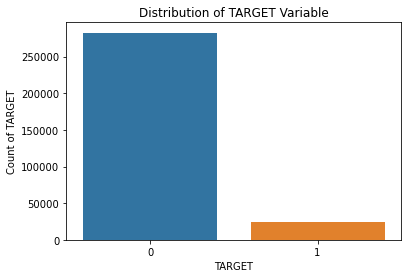

In [7]:
sns.countplot(cust_data.TARGET)
plt.xlabel("TARGET")
plt.ylabel("Count of TARGET")
plt.title("Distribution of TARGET Variable")
plt.show()

In [8]:
cust_data.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

Inference:
It is clear from the analysis that most of the loans were repaid on time (92%). However, around 25000 (8%) loans were turned into bad loans. 

# Missing Values

In [9]:
percent_missing = cust_data.isnull().sum() * 100 / len(cust_data)
missing_values = pd.DataFrame({'columns':cust_data.columns,
                               'percentage missing': percent_missing})

In [10]:
missing_values.sort_values('percentage missing',inplace=True, ascending=False)

In [11]:
missing_values.head(60)

,columns,percentage missing
COMMONAREA_MEDI,COMMONAREA_MEDI,69.872297
COMMONAREA_AVG,COMMONAREA_AVG,69.872297
COMMONAREA_MODE,COMMONAREA_MODE,69.872297
NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_AVG,69.432963
NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MEDI,69.432963
FONDKAPREMONT_MODE,FONDKAPREMONT_MODE,68.386172
LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_MODE,68.354953
LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_AVG,68.354953
LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MEDI,68.354953


# Dropping Columns with high missing values

Columns having more than 60% of data missing can hardly be helpful to gain insights. Hence, the columns having more than 60% missing values are dropped.

In [12]:
retained_columns = list(missing_values[missing_values['percentage missing']<60].index)

In [13]:
cust_data = cust_data[retained_columns]

In [14]:
cust_data.shape

(307511, 105)

# Working with low missing values

In [15]:
low_missing_columns = pd.DataFrame(missing_values[(missing_values['percentage missing']>0) & (missing_values['percentage missing']<15)])
low_missing_columns

,columns,percentage missing
AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_HOUR,13.501631
AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_DAY,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_MON,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_QRT,13.501631
AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_YEAR,13.501631
NAME_TYPE_SUITE,NAME_TYPE_SUITE,0.420148
OBS_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.332021
DEF_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.332021
OBS_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.332021


In [16]:
cust_data['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(normalize=True).head()

0.0    0.993887
1.0    0.005865
2.0    0.000211
3.0    0.000034
4.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [17]:
cust_data['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize=True).head()

0.0    0.994402
1.0    0.004857
2.0    0.000399
3.0    0.000169
4.0    0.000098
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [18]:
cust_data['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize=True).head()

0.0    0.967909
1.0    0.030858
2.0    0.000748
3.0    0.000218
4.0    0.000128
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [19]:
cust_data['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(normalize=True).head()

0.0    0.835488
1.0    0.124617
2.0    0.020249
3.0    0.007485
4.0    0.004045
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [20]:
cust_data['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(normalize=True).head()

0.0    0.809863
1.0    0.127305
2.0    0.054182
3.0    0.006455
4.0    0.001790
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [21]:
cust_data['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(normalize=True).head()

0.0    0.269937
1.0    0.238372
2.0    0.188697
3.0    0.126425
4.0    0.077875
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

As in the following columns

1. AMT_REQ_CREDIT_BUREAU_HOUR
2. AMT_REQ_CREDIT_BUREAU_DAY
3. AMT_REQ_CREDIT_BUREAU_WEEK
4. AMT_REQ_CREDIT_BUREAU_MON
5. AMT_REQ_CREDIT_BUREAU_QRT
6. AMT_REQ_CREDIT_BUREAU_YEAR

most record has 0 as the value, we can impute 0 at null places. 
Here 0 signifies that no enquiry was made during that time.

In [22]:
cust_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0,inplace=True)

In [23]:
cust_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0,inplace=True)

In [24]:
cust_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0,inplace=True)

In [25]:
cust_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0,inplace=True)

In [26]:
cust_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0,inplace=True)

In [27]:
cust_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0,inplace=True)

# Lets look at the table info once

In [28]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 105 entries, LANDAREA_MEDI to SK_ID_CURR
dtypes: float64(49), int64(41), object(15)
memory usage: 246.3+ MB


We are having three kinds of data types : float64, int64, object.
Lets have a look at the kind of data they contains

In [29]:
cust_data.select_dtypes('object').columns

Index(['WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE',
       'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'NAME_CONTRACT_TYPE',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'NAME_HOUSING_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE'],
      dtype='object')

In [30]:
cust_data.select_dtypes('float64').columns

Index(['LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG', 'BASEMENTAREA_MEDI',
       'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1',
       'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI',
       'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'APARTMENTS_MEDI',
       'APARTMENTS_AVG', 'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG',
       'ENTRANCES_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE',
       'LIVINGAREA_MEDI', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE', 'EXT_SOURCE_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2',
    

In [31]:
cust_data.select_dtypes('int64').columns

Index(['CNT_CHILDREN', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_21',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_12', 'FLAG_PHONE',
       'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'TARGET',
       'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION',
       'HOUR_APPR_PROCESS_START', 'REGION_RATING_CLIENT_W_CITY',
       'REGION_RATING_CLIENT', 'FLAG_EMAIL', 'FLAG_CONT_MOBILE',
       'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'DAYS_ID_PUBLISH',
       'DAYS_EMPLOYED', 'DAYS_BIRTH', 'SK_ID_CURR'],
      dtype='object')

Observation: int columns contains lots of FLAG_<XYZ> values. FLAG values generally consists of 2 values (0,1 or T, F). Let's verify the same.

In [32]:
cust_data.select_dtypes('int64').apply(pd.Series.nunique,axis = 0)

CNT_CHILDREN                       15
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_9                     2
FLAG_DOCUMENT_21                    2
FLAG_DOCUMENT_10                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_13                    2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_15                    2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_17                    2
FLAG_DOCUMENT_18                    2
FLAG_DOCUMENT_19                    2
FLAG_DOCUMENT_20                    2
FLAG_DOCUMENT_12                    2
FLAG_PHONE                          2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_WORK_CITY              2
TARGET                              2
REG_CITY_NOT_LIVE_CITY              2
LIVE_REGION_

As anticipated lots of int columns have 2 values. To better utilise these columns, we can convert them into categorical values (Y or N)

In [33]:
#cols_to_convert=list(cust_data[(cust_data.nunique==2)&(cust_data.dtypes=="int64")].index,axis=0)
cols_to_convert = ['FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_21',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_12', 'FLAG_PHONE',
       'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'TARGET',
       'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION',
       'FLAG_EMAIL', 'FLAG_CONT_MOBILE','FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL']

#function to convert columns
def convert(cust_data, cols_to_convert):
    for y in cols_to_convert:
        cust_data.loc[:,y].replace((0, 1), ('N', 'Y'), inplace=True)
    return cust_data

convert(cust_data, cols_to_convert)
cust_data.TARGET.replace(('N', 'Y'), (0, 1), inplace=True)
cust_data.dtypes.value_counts()

float64    49
object     47
int64       9
dtype: int64

# Analysis

# NAME_CONTRACT_TYPE

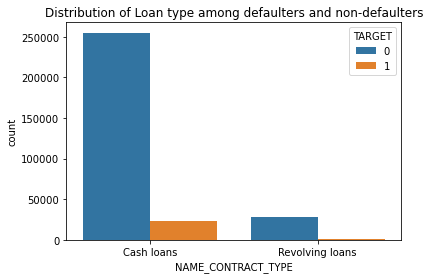

In [34]:
sns.countplot(x='NAME_CONTRACT_TYPE',data=cust_data,hue='TARGET')
plt.title('Distribution of Loan type among defaulters and non-defaulters')
plt.show()

Cash loans are much higher than Revolving loans in both cases(Target=0 and Target=1)

# GENDER

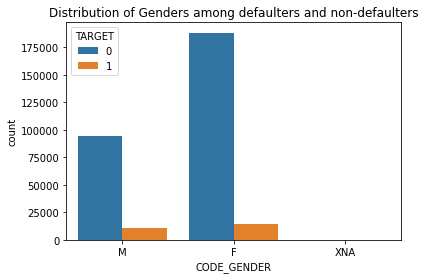

In [35]:
sns.countplot(x='CODE_GENDER',data=cust_data,hue='TARGET')
plt.title('Distribution of Genders among defaulters and non-defaulters')
plt.show()

In [36]:
cust_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Number of females taking loans are mich higher than number of males.

# FLAG_OWN_CAR

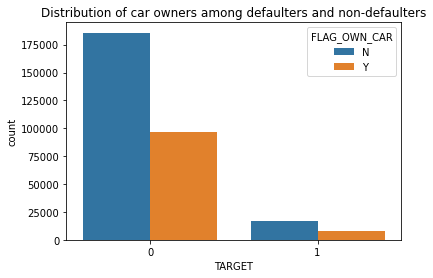

In [37]:
sns.countplot(x='TARGET',data=cust_data,hue='FLAG_OWN_CAR')
plt.title('Distribution of car owners among defaulters and non-defaulters')
plt.show()

Most of the people applying for loan does not own a car.
Also, ratio of people who owns a car have high chance of being a non-defaulter.

# FLAG_OWN_REALTY

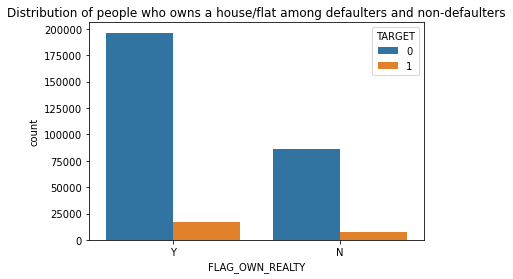

In [38]:
sns.countplot(x='FLAG_OWN_REALTY',data=cust_data,hue='TARGET')
plt.title('Distribution of people who owns a house/flat among defaulters and non-defaulters')
plt.show()

Most people who owns a house have taken more loans and remains non-defaulters.

# TYPE OF HOUSE

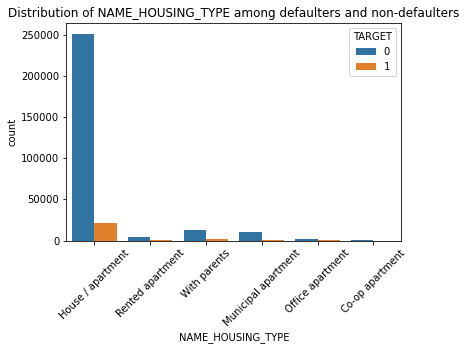

In [39]:
sns.countplot(x='NAME_HOUSING_TYPE',data=cust_data,hue='TARGET')
plt.title('Distribution of NAME_HOUSING_TYPE among defaulters and non-defaulters')
plt.xticks(rotation=45)
plt.show()

People who lives in house/apartment have more chances of taking loans and also being a defaulter.
However, people who live with parents have higher chances of having payment difficulties (as the ratio of defaulter and non-defaulter is more)

plt.subplot(1,2,1)
plt.plot(cust_data[cust_data['TARGET']==1],cust_data['NAME_CONTRACT_TYPE'])
plt.title('Defaulters')

plt.subplot(1,2,2)
plt.plot(cust_data[cust_data['TARGET']==0],cust_data['NAME_CONTRACT_TYPE'])
plt.title('Non-defaulters')

# NUMBER OF CHILDREN

In [40]:
cust_data['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

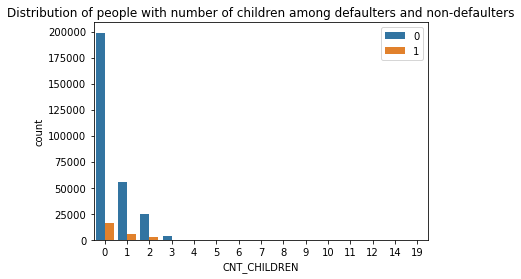

In [41]:
sns.countplot(x='CNT_CHILDREN',data=cust_data,hue='TARGET')
plt.title('Distribution of people with number of children among defaulters and non-defaulters')
plt.legend(loc='upper right')
plt.show()

People tend to take loans when they have less or no children. However ratio of people taking loans having 2 or 3 children is more.

# FAMILY STATUS

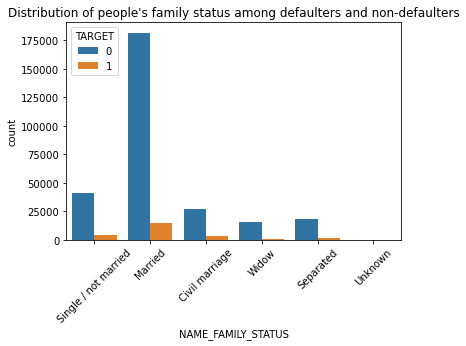

In [42]:
sns.countplot(x='NAME_FAMILY_STATUS',data=cust_data,hue='TARGET')
plt.title("Distribution of people's family status among defaulters and non-defaulters")
plt.xticks(rotation=45)
plt.show()

Married people tend to take more loans. Also it looks they face more payment difficulties.

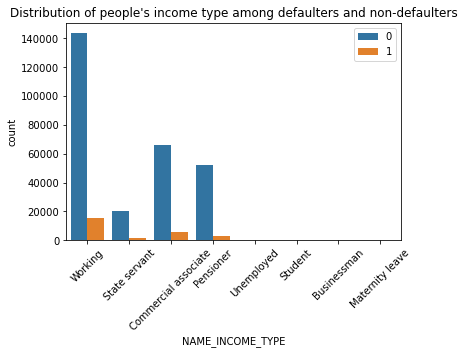

In [43]:
sns.countplot(x='NAME_INCOME_TYPE',data=cust_data,hue='TARGET')
plt.title("Distribution of people's income type among defaulters and non-defaulters")
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

Commercial associates, Pensioners, State servants have higher ratio to total in non-defaulters

# EDUCATIONAL STAUTS

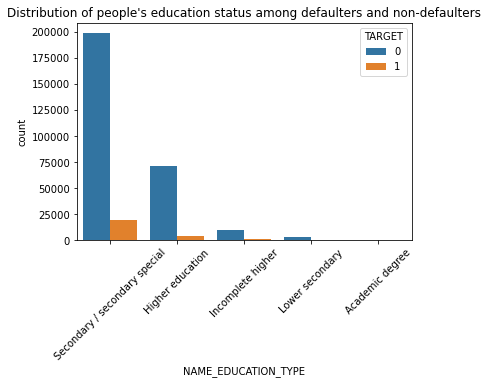

In [44]:
sns.countplot(x='NAME_EDUCATION_TYPE',data=cust_data,hue='TARGET')
plt.title("Distribution of people's education status among defaulters and non-defaulters")
plt.xticks(rotation=45)
plt.show()

People with academic degree rarley take loans.
People with secondary or higher education takes more loans.

# OCCUPATION TYPE

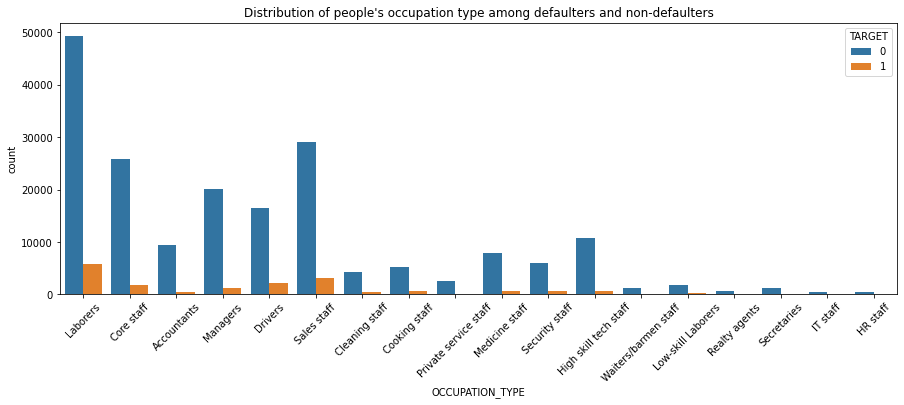

In [45]:
plt.figure(figsize=(15,5))
sns.countplot(x='OCCUPATION_TYPE',data=cust_data,hue='TARGET')
plt.title("Distribution of people's occupation type among defaulters and non-defaulters")
plt.xticks(rotation=45)
plt.show()

# PERMANENT, CONTACT AND WORK ADDRESS

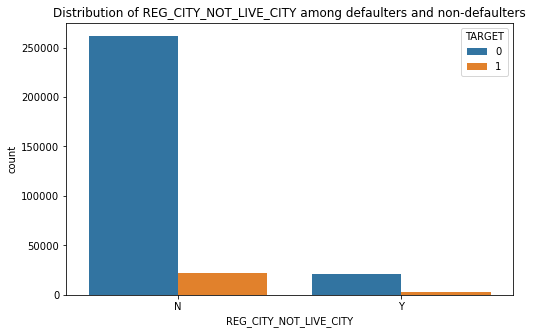

In [46]:
plt.figure(figsize=(8,5))
sns.countplot(x='REG_CITY_NOT_LIVE_CITY',data=cust_data,hue='TARGET')
plt.title("Distribution of REG_CITY_NOT_LIVE_CITY among defaulters and non-defaulters")
plt.show()

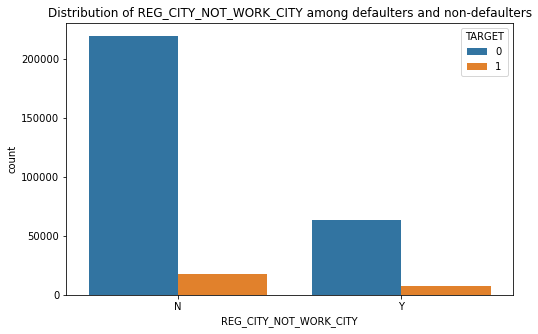

In [47]:
plt.figure(figsize=(8,5))
sns.countplot(x='REG_CITY_NOT_WORK_CITY',data=cust_data,hue='TARGET')
plt.title("Distribution of REG_CITY_NOT_WORK_CITY among defaulters and non-defaulters")
plt.show()

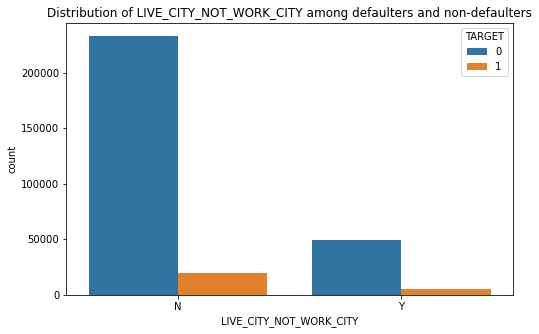

In [48]:
plt.figure(figsize=(8,5))
sns.countplot(x='LIVE_CITY_NOT_WORK_CITY',data=cust_data,hue='TARGET')
plt.title("Distribution of LIVE_CITY_NOT_WORK_CITY among defaulters and non-defaulters")
plt.show()

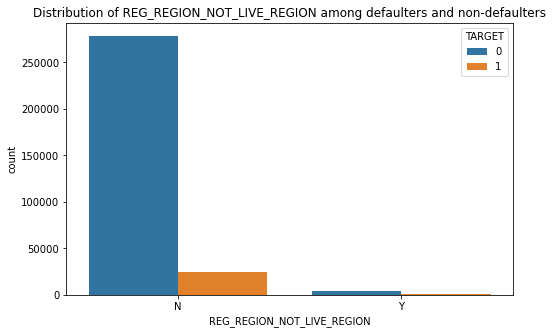

In [49]:
plt.figure(figsize=(8,5))
sns.countplot(x='REG_REGION_NOT_LIVE_REGION',data=cust_data,hue='TARGET')
plt.title("Distribution of REG_REGION_NOT_LIVE_REGION among defaulters and non-defaulters")
plt.show()

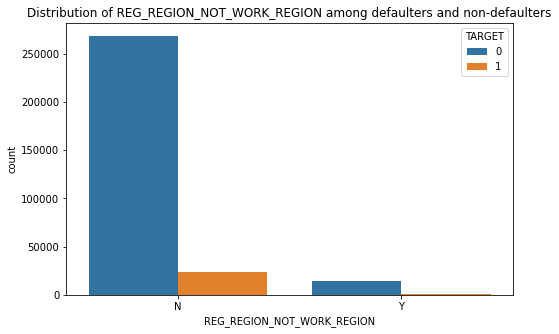

In [50]:
plt.figure(figsize=(8,5))
sns.countplot(x='REG_REGION_NOT_WORK_REGION',data=cust_data,hue='TARGET')
plt.title("Distribution of REG_REGION_NOT_WORK_REGION among defaulters and non-defaulters")
plt.show()

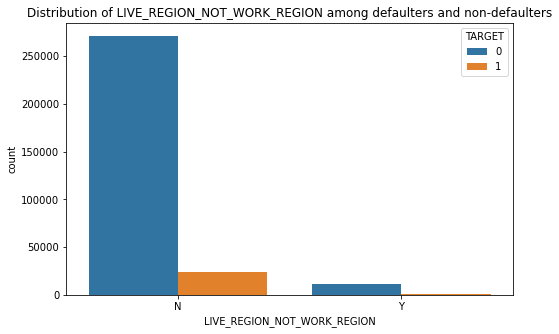

In [51]:
plt.figure(figsize=(8,5))
sns.countplot(x='LIVE_REGION_NOT_WORK_REGION',data=cust_data,hue='TARGET')
plt.title("Distribution of LIVE_REGION_NOT_WORK_REGION among defaulters and non-defaulters")
plt.show()

1. Ratio of people whose Registration city is not same as live city or work city is higher in case of defaulters.
This means people who work or live in other than their registration city are more likely to face payment difficulties.
2. Similar patterns have been observed with living city and working city

# ORGANIZATION TYPE

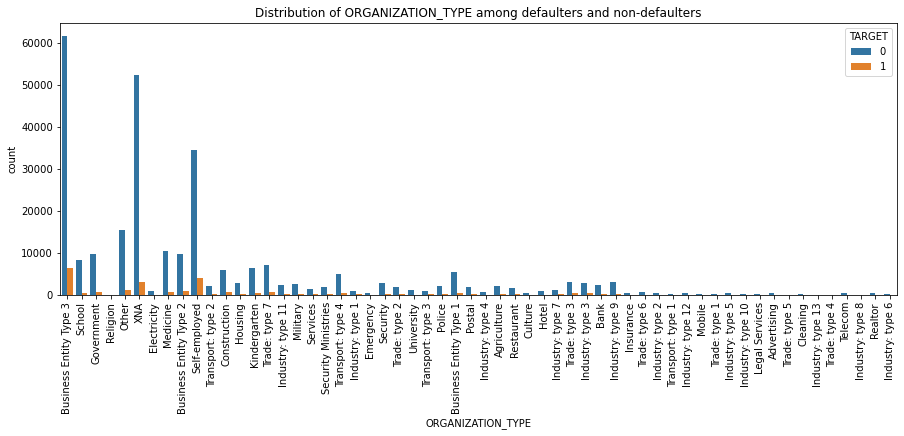

In [52]:
plt.figure(figsize=(15,5))
sns.countplot(x='ORGANIZATION_TYPE',data=cust_data,hue='TARGET')
plt.title("Distribution of ORGANIZATION_TYPE among defaulters and non-defaulters")
plt.xticks(rotation=90)
plt.show()

# INCOME TYPE

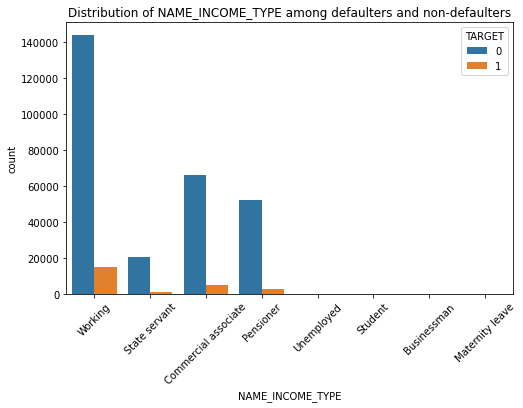

In [53]:
plt.figure(figsize=(8,5))
sns.countplot(x='NAME_INCOME_TYPE',data=cust_data,hue='TARGET')
plt.title("Distribution of NAME_INCOME_TYPE among defaulters and non-defaulters")
plt.xticks(rotation=45)
plt.show()

# OCCUPATION TYPE

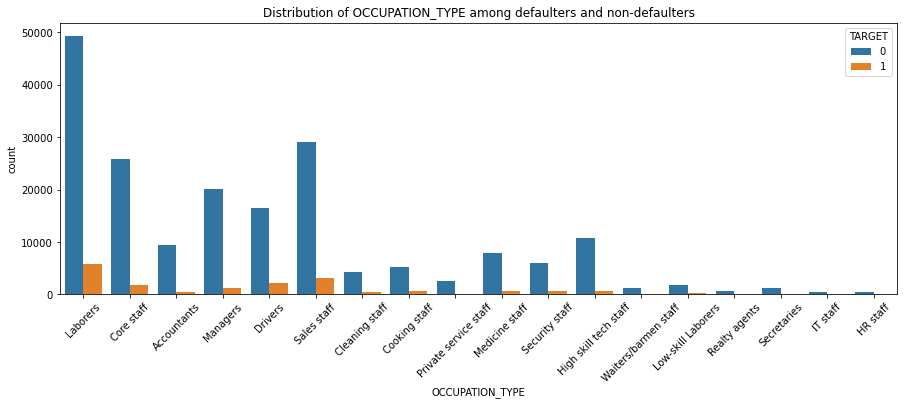

In [54]:
plt.figure(figsize=(15,5))
sns.countplot(x='OCCUPATION_TYPE',data=cust_data,hue='TARGET')
plt.title("Distribution of OCCUPATION_TYPE among defaulters and non-defaulters")
plt.xticks(rotation=45)
plt.show()

# UNIVARIATE AND BIVARIATE ANALYSIS ON NUMERIC COLUMNS

In [55]:
cust_data.select_dtypes('object').columns

Index(['WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE',
       'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'FLAG_DOCUMENT_8',
       'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_OWN_REALTY', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_12', 'FLAG_PHONE', 'LIVE_CITY_NOT_WORK_CITY',
       'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION',
       'REG_REGION_NOT_LIVE_REGION', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_EMAIL', 'FLAG_CONT_MOBILE', 'ORGANIZATION_TYPE',
       'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'NAME_HOUS

In [56]:
cust_data.select_dtypes('int64').columns

Index(['CNT_CHILDREN', 'TARGET', 'HOUR_APPR_PROCESS_START',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'SK_ID_CURR'],
      dtype='object')

In [57]:
cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',]

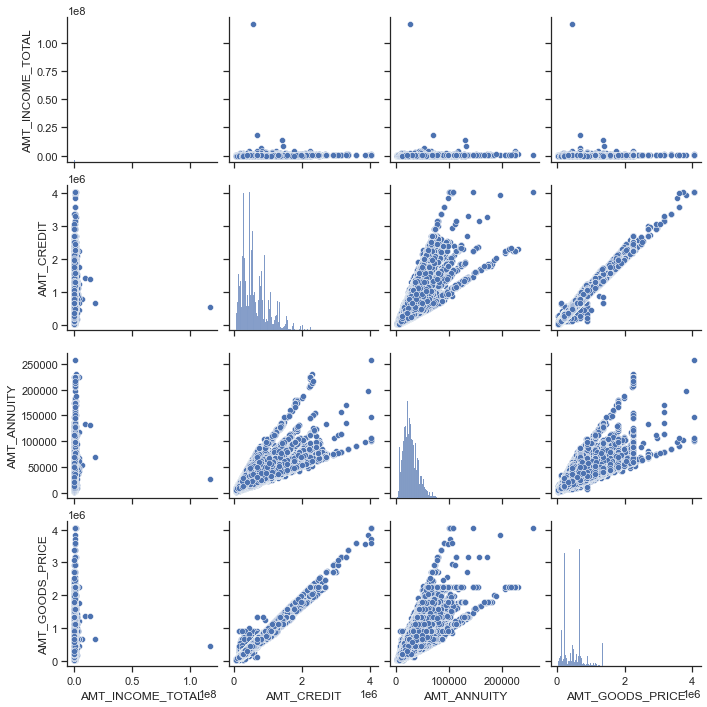

In [58]:
sns.set(style='ticks',color_codes=True)
sns.pairplot(cust_data,vars=cols)